Import the neccessary libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Data Loading

In [41]:
try:
    df = pd.read_csv("coin_Ethereum.csv")
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: 'coin_Ethereum.csv' was not found. Please check if file is in same directory")
    exit()
df

Data loaded successfully!


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,6.741880e+05,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,5.321700e+05,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,4.052830e+05,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1.463100e+06,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2.150620e+06,7.364501e+07
...,...,...,...,...,...,...,...,...,...,...
2155,2156,Ethereum,ETH,2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
2156,2157,Ethereum,ETH,2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
2157,2158,Ethereum,ETH,2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11
2158,2159,Ethereum,ETH,2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11


Data Prepreprocessing

In [42]:
# Check for missing values
df_missing = df.isnull().sum()
print("Missing Values")
print(df_missing)

Missing Values
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64


In [43]:
# Check for duplicated values
df_duplicated = df.duplicated().sum()
print("Duplicated rows")
print(df_duplicated)

Duplicated rows
0


In [44]:
# Rename the columns for clarity and consistency
df.rename(columns={
    "SNo":"serial_number",
    "Name":"name",
    "Symbol":"symbol",
    "Date":"date",
    "High":"high",
    "Low":"low",
    "Open":"open",
    "Close":"close",
    "Volume":"volume",
    "Marketcap":"marketcap"
},inplace=True)


In [45]:
# Convert the "date" column to datetime object
df["date"] = pd.to_datetime(df["date"])

In [46]:
# Set the "date" as the index for easier time series plotting and alignment
df.set_index("date",inplace=True)

Feature Engineering

In [47]:
features = ["open","high","low","volume"]
target = "close"

# Define the feature matrix (X) and the target vector (y)
X = df[features]
y = df[target]

Data Visualization (Before Training)

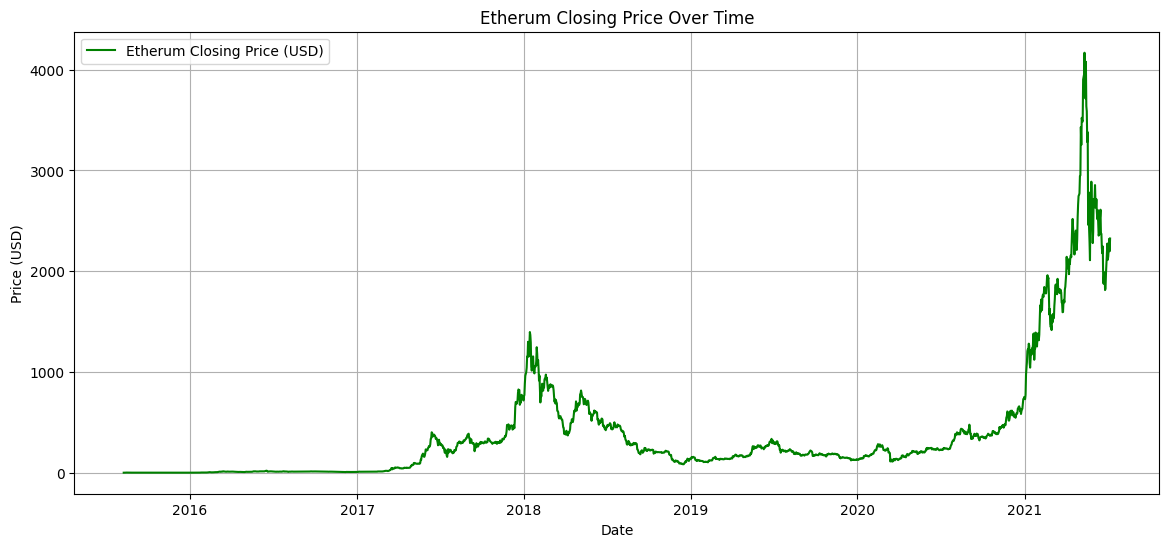

In [48]:
# Create a figure and axis for the time series series plot
plt.figure(figsize=(14,6))
# Plot the Etherum Closing Price over time to visualize the trend and volatility
plt.plot(df.index,df["close"],label="Etherum Closing Price (USD)",color="green",linewidth=1.5)
plt.title("Etherum Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

Data Splitting and Scaling

In [49]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Initialize the StandardScaler for feature scaling
scaler = StandardScaler()

# Fit the scaler only on the training data to prevent data leakage
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.fit_transform(X_test)

# Convert scaled arrays back to DataFrames for consistency 
X_train_scaled = pd.DataFrame(X_train_scaled,columns=features,index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=features,index=X_test.index)

Model Training and Comparison

In [50]:
# Dictionary to store the models to be compared
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decison Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100,random_state=42,n_jobs=1)
}

# Dictionary to store the performance results for all models
results = {}

print("Trainng Models and Evaluating the Performance")

# Loop through each model to train, predict and evaluate
for name, model in models.items():
    print(f"Training {name}.....")

    # Linear and Regularized models require scaled data for optimal performance
    if name in ["Linear Regression","Ridge Regression","Lasso Regression","Elastic Net"]:
        model.fit(X_train_scaled,y_train)
        y_pred = model.predict(X_test_scaled)
    # Tree-based models are scale-invariant, so we use unscaled data for simplicity
    else:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    r2 = r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)

    # Store the results
    results[name] = {
        "R2 Score": r2,
        "MSE": mse,
        "MAE": mae,
        "Predictions": y_pred
    }

    print(f"   -> R2 Score: {r2:.4f},MAE:{mae:.2f} USD")

# Convert results into a DataFrame for easy comparison
results_df = pd.DataFrame({k:v for k,v in results.items() if k != "Predictions"}).T

# Sort the results by R2 Score in descending order to find the best model
results_df = results_df.sort_values(by="R2 Score",ascending=False)

print("Model Comaprison Summary")
print(results_df.to_markdown())

# Identify the best model based on the highest R2 Score
best_model_name = results_df.index[0]
best_model = models[best_model_name]
y_pred_best = results[best_model_name]["Predictions"]
print(f"Conclusion: The Best Performing model is the {best_model_name}")

Trainng Models and Evaluating the Performance
Training Linear Regression.....
   -> R2 Score: 0.9469,MAE:63.07 USD
Training Ridge Regression.....
   -> R2 Score: 0.9472,MAE:63.21 USD
Training Lasso Regression.....
   -> R2 Score: 0.9470,MAE:63.11 USD
Training Elastic Net.....
   -> R2 Score: 0.9551,MAE:60.37 USD
Training Decison Tree Regressor.....
   -> R2 Score: 0.9979,MAE:9.76 USD
Training Random Forest Regressor.....


c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.533e+05, tolerance: 6.666e+04
  model = cd_fast.enet_coordinate_descent(


   -> R2 Score: 0.9985,MAE:8.21 USD
Model Comaprison Summary
|                         |   R2 Score |       MSE |      MAE | Predictions                                                            |
|:------------------------|-----------:|----------:|---------:|:-----------------------------------------------------------------------|
| Random Forest Regressor |   0.99854  |   381.445 |  8.21107 | [2.44530124e+03 2.58085359e+02 2.15652399e+03 2.81756770e+02           |
|                         |            |           |          |  2.96753462e+02 2.39682169e+02 2.39622161e+02 1.82699120e+02           |
|                         |            |           |          |  9.25621909e+02 2.27861097e+03 3.60134103e+02 1.62842910e+03           |
|                         |            |           |          |  8.27235431e-01 2.14035731e+02 1.32046929e+01 9.02336357e-01           |
|                         |            |           |          |  1.33555658e+00 1.87964508e+02 3.89526215e+02 5.68064

Visualization (After Training: Actual vs Predicted Values)

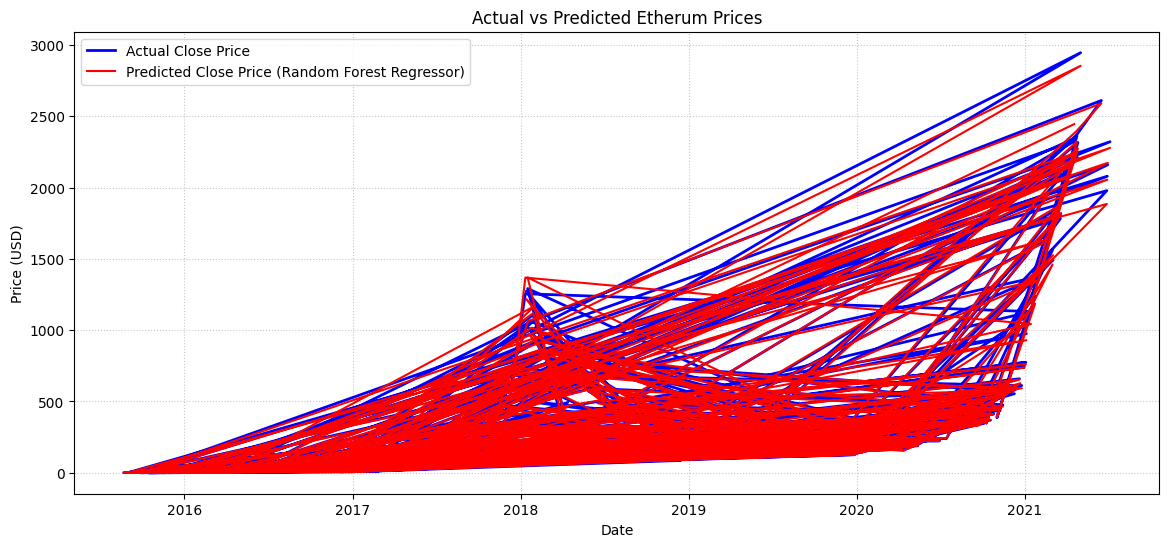

In [51]:
# Create a plot to visualize the performance of the best model on the test set
plt.figure(figsize=(14,6))
# Plot the actual closing price from the test set
plt.plot(y_test.index,y_test.values,label="Actual Close Price",color="blue",linewidth=2)
# Plot the predicted closing price from the best model
plt.plot(y_test.index,y_pred_best,label=f"Predicted Close Price ({best_model_name})",color="red")
plt.title(f"Actual vs Predicted Etherum Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True,linestyle=":",alpha=0.7)
plt.show()

Making a New Prediction

In [52]:

# Define a function to simulate a user input query for prediction using the best model.
def predict_new_price(model, high_price, low_price, open_price, volume, is_scaled_model):
    """
    Predicts the closing price based on new input features.
    
    Args:
        model: The trained scikit-learn model.
        high_price, low_price, open_price, volume: Input features.
        is_scaled_model: Boolean indicating if the model requires scaled inputs.
    
    Returns:
        The predicted closing price.
    """
    # Create a DataFrame for the new input data.
    new_data = pd.DataFrame([[open_price, high_price, low_price, volume]], columns=features)
    
    # Determine if scaling is needed based on the best model type.
    if is_scaled_model:
        # Scale the new data using the previously fitted scaler.
        new_data_scaled = scaler.transform(new_data)
        # Make the prediction using the scaled data.
        prediction = model.predict(new_data_scaled)
    else:
        # Make the prediction directly using the unscaled data (for tree models).
        prediction = model.predict(new_data)
    
    # Return the first (and only) prediction value.
    return prediction[0]

# Check if the best model requires scaled input (Linear/Regularized models).
requires_scaling = best_model_name in ["Linear Regression", "Ridge Regression", "Lasso Regression", "Elastic Net"]

# --- Input Query Example ---
print("\n--- Interactive Input Simulation (Using Best Model) ---")
# User Query: "If Ethereum opens at $3000, hits a high of $3100, drops to a low of $2950, and has a volume of 50 Billion, what is the predicted closing price?"

# Simulate user input values.
sim_open = 3000.0
sim_high = 3100.0
sim_low = 2950.0
# Note: Volume is scaled by a factor of 1e9 for better readability in the example
sim_volume = 50e9 

# Call the prediction function with the simulated data.
predicted_close = predict_new_price(
    best_model, 
    sim_high, 
    sim_low, 
    sim_open, 
    sim_volume, 
    requires_scaling
)

# Print the result of the simulated query.
print(f"Best Model Used: {best_model_name}")
print(f"Inputs: Open=${sim_open:.2f}, High=${sim_high:.2f}, Low=${sim_low:.2f}, Volume={sim_volume:.0f}")
print(f"Predicted Closing Price: ${predicted_close:.2f}")

# Display the performance of the regularized linear models (for comparison of coefficients).
if 'Ridge Regression' in models and 'Lasso Regression' in models and requires_scaling:
    print("\n--- Regularization Comparison (Coefficients) ---")
    
    # Get the coefficients for Ridge, Lasso, and Linear Regression models.
    ridge_coeffs = models['Ridge Regression'].coef_
    lasso_coeffs = models['Lasso Regression'].coef_
    linear_coeffs = models['Linear Regression'].coef_
    
    # Create a DataFrame to display the comparison.
    coeff_df = pd.DataFrame({
        'Feature': features,
        'Linear Coeff': linear_coeffs,
        'Ridge Coeff': ridge_coeffs,
        'Lasso Coeff': lasso_coeffs
    })
    
    # Print a statement about Lasso's behavior.
    print("Notice how Lasso Regression forces the coefficient of the least important feature (Volume) towards zero, effectively performing feature selection.")
    # Print the coefficient table.
    print(coeff_df.to_markdown(index=False, floatfmt=".6f"))

# Final message indicating the script completion.
print("\n--- Script Execution Complete ---")



--- Interactive Input Simulation (Using Best Model) ---
Best Model Used: Random Forest Regressor
Inputs: Open=$3000.00, High=$3100.00, Low=$2950.00, Volume=50000000000
Predicted Closing Price: $3145.22

--- Script Execution Complete ---
